# COP and COG estimation by linear regression
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the linear regression

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [17]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
 #               rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [18]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Sat Dec 04 20:56:52 2021 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [194]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))
PDSinfo[PDSinfo["Subject"]==12]

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


,Trial,Subject,Vision,Surface,Rep,Age,AgeGroup,Gender,Height,Mass,...,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,PhysicalActivity,Sequence,Date
132,PDS12OR1,12,Open,Rigid,1,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
133,PDS12OR2,12,Open,Rigid,2,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
134,PDS12OR3,12,Open,Rigid,3,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
135,PDS12OF1,12,Open,Foam,1,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
136,PDS12OF2,12,Open,Foam,2,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
137,PDS12OF3,12,Open,Foam,3,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
138,PDS12CR1,12,Closed,Rigid,1,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
139,PDS12CR2,12,Closed,Rigid,2,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
140,PDS12CR3,12,Closed,Rigid,3,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410
141,PDS12CF1,12,Closed,Foam,1,24.75,Young,F,1.58,48.8,...,1,Oral contraceptive,Yes,Corrective lens,No,No,0,2,"OR, CF, OF, CR",2016-08-22 11:12:36.410


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

## Trial 150

In [20]:
fname_grf = os.path.join(path2, PDSinfo.Trial[150] + 'grf' + '.txt') 
fname_mkr = os.path.join(path2, PDSinfo.Trial[150] + 'mkr' + '.txt')
grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
print(fname_grf, grf.shape)
print(fname_mkr, mkr.shape)

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDS13CR1grf.txt (6000, 21)
C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDS13CR1mkr.txt (6000, 130)


Devemos calcular os coeficientes da equação que relaciona o COG com o COP

In [21]:
y=grf['COPNET_X']
x=mkr['COG_X']
t=mkr['Time']

First it is created the array with values of cop and cog, and then calculated their coefficients, in this case for Trial 150, subject 13.

In [73]:
x1=np.array(x[:-30]).reshape(-1,1)
y1=np.array(y[30:]).reshape(-1,1)
for nt in range(1,30):
    x1=np.hstack((x1,np.array(x[nt:-30+nt]).reshape(-1,1)))
N=len(x1)
f1=np.hstack((x1,np.ones((N,1))))
c,d,_,_=np.linalg.lstsq(x1,y1,rcond=None)

After the coefficients are calculated it is necessary to test the veracity of these values with other trials, for example 154

In [64]:
fname_grftest1=os.path.join(path2, PDSinfo.Trial[154]+'grf'+'.txt')
fname_mkrtest1=os.path.join(path2, PDSinfo.Trial[154]+'mkr'+'.txt')
grftest1=pd.read_csv(fname_grftest1, delimiter='\t', header=0, engine='c')
mkrtest1=pd.read_csv(fname_mkrtest1, delimiter='\t', header=0, engine='c')

In [67]:
u1=mkrtest1['COG_X']
v1=grftest1['COPNET_X']

Now it is done de arrays that gather the data from nt to nt-30 for trial 154

In [74]:
x1test1=np.array(u1[:-30]).reshape(-1,1)
y1test1=np.array(v1[30:]).reshape(-1,1)
for nt in range(1,30):
    x1test1=np.hstack((x1test1,np.array(u1[nt:-30+nt]).reshape(-1,1)))

It is time to plot tje graphics with values of trial number 154 but using trial's 150 coeficient

Text(0, 0.5, 'COP')

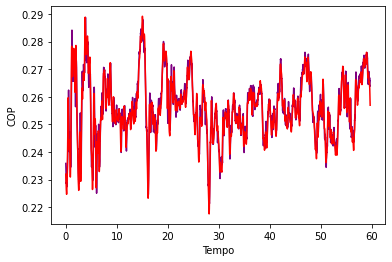

In [75]:
yexttest1=x1test1@c
plt.plot(t[:-30],yexttest1,marker='', color='purple',linestyle='-')
plt.plot(t[:-30],v1[30:],marker='',color='red',linestyle='-')
plt.xlabel('Tempo')
plt.ylabel('COP')

Now it is calculated the mean square error:

In [85]:
yext1med=np.mean(yexttest1)
yreal1med=np.mean(v1[30:])
e1=np.sqrt(np.mean((yext1med-yreal1med)**2))
print(e1)

0.0004716409771949315


## Trial 44

First is taken the data 

In [86]:
fname_grf2=os.path.join(path2,PDSinfo.Trial[44]+'grf'+'.txt')
fname_mkr2=os.path.join(path2,PDSinfo.Trial[44]+'mkr'+'.txt')
grf2=pd.read_csv(fname_grf2,delimiter='\t',header=0,engine='c')
mkr2=pd.read_csv(fname_mkr2,delimiter='\t',header=0,engine='c')

It is necessary to give values to x, y and the time that will be used in the graphic

In [87]:
x2=mkr2['COG_X']
y2=grf2['COPNET_X']
t2=mkr2['Time']

Now we calculate the coeficients that will form the graphics

In [88]:
x22=np.array(x2[:-30]).reshape(-1,1)
y22=np.array(y2[30:]).reshape(-1,1)
for nt in range(1,30):
    x22=np.hstack((x22,np.array(x2[nt:-30+nt]).reshape(-1,1)))
N2=len(x22)
f2=np.hstack((x22,np.ones((N2,1))))
c2,d2,_,_=np.linalg.lstsq(x22,y22,rcond=None)

Collecting the data for the same Subject 4, but in Trial 47

In [89]:
fname_grftest2=os.path.join(path2,PDSinfo.Trial[47]+'grf'+'.txt')
fname_mkrtest2=os.path.join(path2,PDSinfo.Trial[47]+'mkr'+'.txt')
grftest2=pd.read_csv(fname_grftest2,delimiter='\t',header=0,engine='c')
mkrtest2=pd.read_csv(fname_mkrtest2,delimiter='\t',header=0, engine='c')

In [90]:
u2=mkrtest2['COG_X']
v2=grftest2['COPNET_X']

It is necessary to do the array that gather the velues of COG as nt:-30+nt as in:

In [91]:
x2test2=np.array(u2[:-30]).reshape(-1,1)
for nt in range(1,30):
    x2test2=np.hstack((x2test2,np.array(u2[nt:-30+nt]).reshape(-1,1)))

Now to get the graphic:

Text(0, 0.5, 'COP')

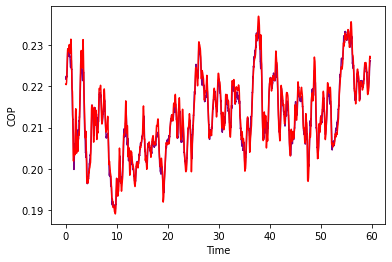

In [92]:
yexttest2=x2test2@c2
plt.plot(t2[:-30],yexttest2,marker='',color='purple',linestyle='-')
plt.plot(t2[:-30],v2[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [93]:
yestimative2med=np.mean(yexttest2)
yreal2med=np.mean(v2[30:])
e2=np.sqrt(np.mean((yestimative2med-yreal2med)**2))
print(e2)

0.0004500774622068493


## Trial 5

Getting data:

In [100]:
fname_grf3=os.path.join(path2,PDSinfo.Trial[5]+'grf'+'.txt')
fname_mkr3=os.path.join(path2,PDSinfo.Trial[5]+'mkr'+'.txt')
grf3=pd.read_csv(fname_grf3, delimiter='\t',header=0,engine='c')
mkr3=pd.read_csv(fname_mkr3, delimiter='\t',header=0,engine='c')

Get the values for x, y and time

In [101]:
x3=mkr3['COG_X']
y3=grf3['COPNET_X']
t3=mkr3['Time']

Get coeficients

In [102]:
x33=np.array(x3[:-30]).reshape(-1,1)
y33=np.array(y3[30:]).reshape(-1,1)
for nt in range(1,30):
    x33=np.hstack((x33,np.array(x3[nt:-30+nt]).reshape(-1,1)))
N3=len(x33)
f3=np.hstack((x33,np.ones((N3,1))))
c3,d3,_,_=np.linalg.lstsq(x33,y33,rcond=None)

Now it is important to get the data for the trial 10, with the same subject 1

In [103]:
fname_grftest3=os.path.join(path2,PDSinfo.Trial[10]+'grf'+'.txt')
fname_mkrtest3=os.path.join(path2,PDSinfo.Trial[10]+'mkr'+'.txt')
grftest3=pd.read_csv(fname_grftest3,delimiter='\t',header=0,engine='c')
mkrtest3=pd.read_csv(fname_mkrtest3,delimiter='\t',header=0,engine='c')

In [104]:
u3=mkrtest3['COG_X']
v3=grftest3['COPNET_X']

It is necessary to calculate the array with nt:-30+nt values of cog

In [105]:
x3test3=np.array(u3[:-30]).reshape(-1,1)
for nt in range(1,30):
    x3test3=np.hstack((x3test3,np.array(u3[nt:-30+nt]).reshape(-1,1)))

Using graphics

Text(0, 0.5, 'COP')

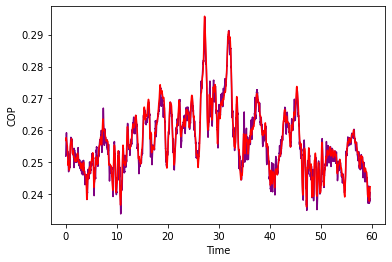

In [106]:
yexttest3=x3test3@c
plt.plot(t3[:-30],yexttest3,marker='',color='purple',linestyle='-')
plt.plot(t3[:-30],v3[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [108]:
yestimative3med=np.mean(yexttest3)
yreal3med=np.mean(v3[30:])
e3=np.sqrt(((yestimative3med-yreal3med)**2))
print(e3)

0.000413230068053827


## Trial 63

Getting data:

In [115]:
fname_grf4=os.path.join(path2,PDSinfo.Trial[63]+'grf'+'.txt')
fname_mkr4=os.path.join(path2,PDSinfo.Trial[63]+'mkr'+'.txt')
grf4=pd.read_csv(fname_grf4,delimiter='\t',header=0,engine='c')
mkr4=pd.read_csv(fname_mkr4,delimiter='\t',header=0,engine='c')

Get the values for x, y and time:

In [116]:
x4=mkr4['COG_X']
y4=grf4['COPNET_X']
t4=mkr4['Time']

Getting the values for the coeficients:

In [125]:
x44=np.array(x4[:-30]).reshape(-1,1)
y44=np.array(y4[30:]).reshape(-1,1)
for nt in range(1,30):
    x44=np.hstack((x44,np.array(x4[nt:-30+nt]).reshape(-1,1)))
N4=len(x44)
f4=np.hstack((x44,np.ones((N4,1))))
c4,d4,_,_=np.linalg.lstsq(x44,y44,rcond=None)

Getting data for Trial 64

In [126]:
fname_grftest4=os.path.join(path2, PDSinfo.Trial[64]+'grf'+'.txt')
fname_mkrtest4=os.path.join(path2, PDSinfo.Trial[64]+'mkr'+'.txt')
grftest4=pd.read_csv(fname_grftest4, delimiter='\t', header=0, engine='c')
mkrtest4=pd.read_csv(fname_mkrtest4, delimiter='\t',header=0, engine='c')

In [127]:
u4=mkrtest4['COG_X']
v4=grftest4['COPNET_X']

Making the array with nt:-30+nt values of cog

In [131]:
x4test4=np.array(u4[:-30]).reshape(-1,1)
for nt in range(1,30):
    x4test4=np.hstack((x4test4,np.array(u4[nt:-30+nt]).reshape(-1,1)))

Ploting the graphic:

Text(0, 0.5, 'COP')

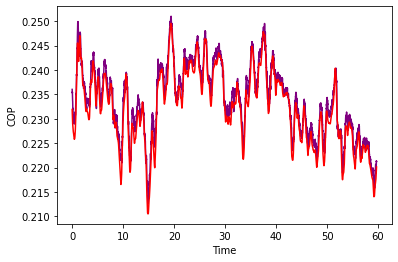

In [132]:
yexttest4=x4test4@c4
plt.plot(t4[:-30],yexttest4,marker='',color='purple',linestyle='-')
plt.plot(t4[:-30],v4[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [133]:
yestimative5med=np.mean(yexttest4)
yreal5med=np.mean(v4[30:])
e5=np.sqrt(((yestimative5med-yreal5med)**2))
print(e5)

0.001588648206737181


## Trial 77

Getting data:

In [135]:
fname_grf5=os.path.join(path2,PDSinfo.Trial[77]+'grf'+'.txt')
fname_mkr5=os.path.join(path2,PDSinfo.Trial[77]+'mkr'+'.txt')
grf5=pd.read_csv(fname_grf5,delimiter='\t',header=0,engine='c')
mkr5=pd.read_csv(fname_mkr5,delimiter='\t',header=0,engine='c')

Get values for x,y and time:

In [136]:
x5=mkr5['COG_X']
y5=grf5['COPNET_X']
t5=mkr5['Time']

Get coeficient values:

In [137]:
x55=np.array(x5[:-30]).reshape(-1,1)
y55=np.array(y5[30:]).reshape(-1,1)
for nt in range(1,30):
    x55=np.hstack((x55,np.array(x5[nt:-30+nt]).reshape(-1,1)))
N5=len(x55)
f5=np.hstack((x55,np.ones((N5,1))))
c5,d5,_,_=np.linalg.lstsq(x55,y55,rcond=None)

Getting data for other trial, trial number 74

In [138]:
fname_grftest5=os.path.join(path2, PDSinfo.Trial[74]+'grf'+'.txt')
fname_mkrtest5=os.path.join(path2, PDSinfo.Trial[74]+'mkr'+'.txt')
grftest5=pd.read_csv(fname_grftest5, delimiter='\t',header=0,engine='c')
mkrtest5=pd.read_csv(fname_mkrtest5, delimiter='\t',header=0,engine='c')

In [139]:
u5=mkr5['COG_X']
v5=grf5['COPNET_X']

It is necessary to do the array with nt:-30+nt values of cog

In [140]:
x5test5=np.array(u5[:-30]).reshape(-1,1)
for nt in range(1,30):
    x5test5=np.hstack((x5test5,np.array(u5[nt:-30+nt]).reshape(-1,1)))

Plot graphic:

Text(0, 0.5, 'COP')

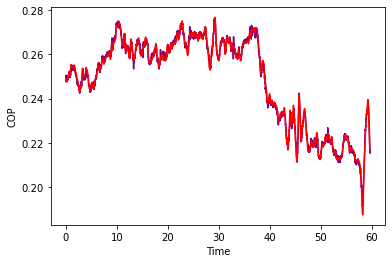

In [141]:
yexttest5=x5test5@c5
plt.plot(t5[:-30],yexttest5,marker='',color='purple',linestyle='-')
plt.plot(t5[:-30],v5[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [142]:
yestimative6med=np.mean(yexttest5)
yreal6med=np.mean(v5[30:])
e6=np.sqrt((yestimative6med-yreal6med)**2)
print(e6)

4.319515498729665e-06


## Trial 16

Getting data

In [148]:
fname_grf6=os.path.join(path2,PDSinfo.Trial[16]+'grf'+'.txt')
fname_mkr6=os.path.join(path2,PDSinfo.Trial[16]+'mkr'+'.txt')
grf6=pd.read_csv(fname_grf6,delimiter='\t',header=0,engine='c')
mkr6=pd.read_csv(fname_mkr6,delimiter='\t',header=0,engine='c')

Getting values for x,y and time

In [149]:
x6=mkr6['COG_X']
y6=grf6['COPNET_X']
t6=mkr6['Time']

Calculating coeficients:

In [150]:
x66=np.array(x6[:-30]).reshape(-1,1)
y66=np.array(y6[30:]).reshape(-1,1)
for nt in range(1,30):
    x66=np.hstack((x66,np.array(x6[nt:-30+nt]).reshape(-1,1)))
N6=len(x66)
f6=np.hstack((x66,np.ones((N6,1))))
c6,d6,_,_=np.linalg.lstsq(x66,y66,rcond=None)

 Getting data for trial 12  for the same subject 2

In [152]:
fname_grftest6=os.path.join(path2,PDSinfo.Trial[12]+'grf'+'.txt')
fname_mkrtest6=os.path.join(path2,PDSinfo.Trial[12]+'mkr'+'.txt')
grftest6=pd.read_csv(fname_grftest6,delimiter='\t', header=0, engine='c')
mkrtest6=pd.read_csv(fname_mkrtest6,delimiter='\t',header=0,engine='c')

In [153]:
u6=mkrtest6['COG_X']
v6=grftest6['COPNET_X']

It is possible to make the array with nt:-30+nt values of cog

In [154]:
x6test6=np.array(u6[:-30]).reshape(-1,1)
for nt in range(1,30):
    x6test6=np.hstack((x6test6,np.array(u6[nt:-30+nt]).reshape(-1,1)))

Plot the graphic

Text(0, 0.5, 'COP')

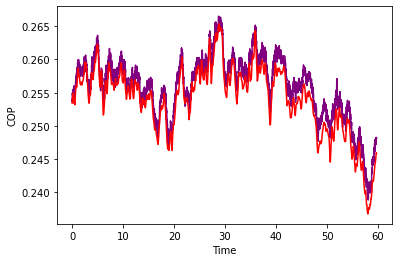

In [155]:
yexttest6=x6test6@c6
plt.plot(t6[:-30],yexttest6,marker='',color='purple',linestyle='-')
plt.plot(t6[:-30],v6[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [156]:
yestimative7med=np.mean(yexttest6)
yreal7med=np.mean(v6[30:])
e7=np.sqrt((yestimative7med-yreal7med)*2)
print(e7)

0.06063199505238785


## Trial 516 

Get data:

In [158]:
fname_grf7=os.path.join(path2,PDSinfo.Trial[516]+'grf'+'.txt')
fname_mkr7=os.path.join(path2,PDSinfo.Trial[516]+'mkr'+'.txt')
grf7=pd.read_csv(fname_grf7,delimiter='\t',header=0,engine='c')
mkr7=pd.read_csv(fname_mkr7,delimiter='\t',header=0,engine='c')

Get values for x, y and time

In [159]:
x7=mkr7['COG_X']
y7=grf7['COPNET_X']
t7=mkr7['Time']

Calculate coeficients

In [161]:
x77=np.array(x7[:-30]).reshape(-1,1)
y77=np.array(y7[30:]).reshape(-1,1)
for nt in range(1,30):
    x77=np.hstack((x77,np.array(x7[nt:-30+nt]).reshape(-1,1)))
N7=len(x77)
f7=np.hstack((x77,np.ones((N7,1))))
c7,d7,_,_=np.linalg.lstsq(x77,y77,rcond=None)

It is necessary to get values for other trial of subject 44

In [162]:
fname_grftest7=os.path.join(path2,PDSinfo.Trial[524]+'grf'+'.txt')
fname_mkrtest7=os.path.join(path2,PDSinfo.Trial[524]+'mkr'+'.txt')
grftest7=pd.read_csv(fname_grftest7,delimiter='\t',header=0,engine='c')
mkrtest7=pd.read_csv(fname_mkrtest7,delimiter='\t',header=0,engine='c')

In [163]:
u7=mkrtest7['COG_X']
v7=grftest7['COPNET_X']

It is necessary to make a array with nt:-30+nt values of cog

In [167]:
x7test7=np.array(u7[:-30]).reshape(-1,1)
for nt in range(1,30):
    x7test7=np.hstack((x7test7,np.array(u7[nt:-30+nt]).reshape(-1,1)))

Plot the graphic

Text(0, 0.5, 'COP')

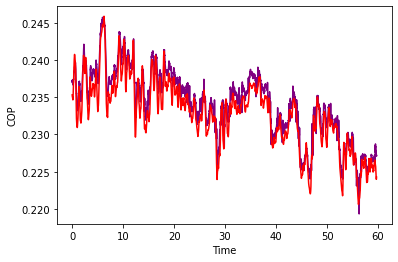

In [168]:
yexttest7=x7test7@c7
plt.plot(t7[:-30],yexttest7,marker='',color='purple',linestyle='-')
plt.plot(t7[:-30],v7[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [169]:
yestimative8med=np.mean(yexttest7)
yreal8med=np.mean(v7[30:])
e8=np.sqrt((yestimative8med-yreal8med)**2)
print(e8)

0.0012890981024283876


## Trial 48

Get the data:

In [172]:
fname_grf8=os.path.join(path2,PDSinfo.Trial[48]+'grf'+'.txt')
fname_mkr8=os.path.join(path2,PDSinfo.Trial[48]+'mkr'+'.txt')
grf8=pd.read_csv(fname_grf8,delimiter='\t',header=0,engine='c')
mkr8=pd.read_csv(fname_mkr8,delimiter='\t',header=0,engine='c')

Get values for x, y and time

In [173]:
x8=mkr8['COG_X']
y8=grf8['COPNET_X']
t8=mkr8['Time']

Calculate the coeficient:

In [174]:
x88=np.array(x8[:-30]).reshape(-1,1)
y88=np.array(y8[30:]).reshape(-1,1)
for nt in range(1,30):
    x88=np.hstack((x88,np.array(x8[nt:-30+nt]).reshape(-1,1)))
N8=len(x88)
f8=np.hstack((x88,np.ones((N8,1))))
c8,d8,_,_=np.linalg.lstsq(x88,y88,rcond=None)

Now it is necessary to take data for the trial 54, with the same subject 5

In [176]:
fname_grftest8=os.path.join(path2,PDSinfo.Trial[54]+'grf'+'.txt')
fname_mkrtest8=os.path.join(path2,PDSinfo.Trial[54]+'mkr'+'.txt')
grftest8=pd.read_csv(fname_grftest8,delimiter='\t',header=0,engine='c')
mkrtest8=pd.read_csv(fname_mkrtest8,delimiter='\t',header=0,engine='c')

In [177]:
u8=mkrtest8['COG_X']
v8=grftest8['COPNET_X']

We make an array with COG values from nt:-30+nt

In [178]:
x8test8=np.array(u8[:-30]).reshape(-1,1)
for nt in range(1,30):
    x8test8=np.hstack((x8test8,np.array(u8[nt:-30+nt]).reshape(-1,1)))

Plot graphics:

Text(0, 0.5, 'COP')

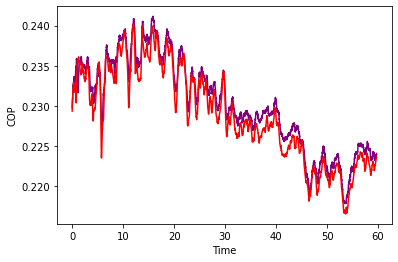

In [179]:
yexttest8=x8test8@c8
plt.plot(t8[:-30],yexttest8,marker='',color='purple',linestyle='-')
plt.plot(t8[:-30],v8[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [180]:
yestimative9med=np.mean(yexttest8)
yreal9med=np.mean(v8[30:])
e9=np.sqrt((yestimative9med-yreal9med)**2)
print(e9)

0.0012787303758958202


## Trial 108

Get data:

In [183]:
fname_grf9=os.path.join(path2,PDSinfo.Trial[108]+'grf'+'.txt')
fname_mkr9=os.path.join(path2,PDSinfo.Trial[108]+'mkr'+'.txt')
grf9=pd.read_csv(fname_grf9,delimiter='\t',header=0,engine='c')
mkr9=pd.read_csv(fname_mkr9,delimiter='\t',header=0,engine='c')

Get values for x,y and time

In [184]:
x9=mkr9['COG_X']
y9=grf9['COPNET_X']
t9=mkr9['Time']

Calculate coeficient:

In [185]:
x99=np.array(x9[:-30]).reshape(-1,1)
y99=np.array(y9[30:]).reshape(-1,1)
for nt in range(1,30):
    x99=np.hstack((x99,np.array(x9[nt:-30+nt]).reshape(-1,1)))
N9=len(x99)
f9=np.hstack((x99,np.ones((N9,1))))
c9,d9,_,_=np.linalg.lstsq(x99,y99,rcond=None)

Now for data on trial 114

In [186]:
fname_grftest9=os.path.join(path2,PDSinfo.Trial[114]+'grf'+'.txt')
fname_mkrtest9=os.path.join(path2,PDSinfo.Trial[114]+'mkr'+'.txt')
grftest9=pd.read_csv(fname_grftest9,delimiter='\t',header=0,engine='c')
mkrtest9=pd.read_csv(fname_mkrtest9,delimiter='\t',header=0,engine='c')

In [187]:
u9=mkrtest9['COG_X']
v9=grftest9['COPNET_X']

Gather values for cog in trial 114 for nt:-30+nt

In [191]:
x9test9=np.array(u9[:-30]).reshape(-1,1)
for nt in range(1,30):
    x9test9=np.hstack((x9test9,np.array(u9[nt:-30+nt]).reshape(-1,1)))

Plot graphic

Text(0, 0.5, 'COP')

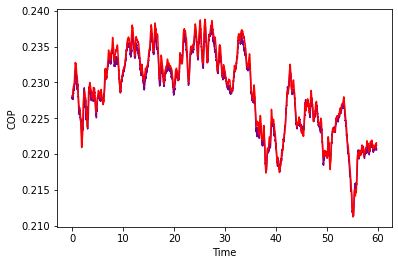

In [192]:
yexttest9=x9test9@c9
plt.plot(t9[:-30],yexttest9,marker='',color='purple',linestyle='-')
plt.plot(t9[:-30],v9[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [193]:
yestimative10med=np.mean(yexttest9)
yreal10med=np.mean(v9[30:])
e10=np.sqrt((yestimative10med-yreal10med)**2)
print(e10)

0.0005286553121657545


## Subject 12

Get data

In [195]:
fname_grf10=os.path.join(path2,PDSinfo.Trial[134]+'grf'+'.txt')
fname_mkr10=os.path.join(path2,PDSinfo.Trial[134]+'mkr'+'.txt')
grf10=pd.read_csv(fname_grf10,delimiter='\t',header=0,engine='c')
mkr10=pd.read_csv(fname_mkr10,delimiter='\t',header=0,engine='c')

Get values for x,y and time:

In [196]:
x10=mkr10['COG_X']
y10=grf10['COPNET_X']
t10=mkr10['Time']

Calculate coeficient:

In [198]:
x100=np.array(x10[:-30]).reshape(-1,1)
y100=np.array(y10[30:]).reshape(-1,1)
for nt in range(1,30):
    x100=np.hstack((x100,np.array(x10[nt:-30+nt]).reshape(-1,1)))
N10=len(x100)
f10=np.hstack((x100,np.ones((N10,1))))
c10,d10,_,_=np.linalg.lstsq(x100,y100,rcond=None)

Getting data for the same subject, diferent trial, trial 140

In [199]:
fname_grftest10=os.path.join(path2,PDSinfo.Trial[140]+'grf'+'.txt')
fname_mkrtest10=os.path.join(path2,PDSinfo.Trial[140]+'mkr'+'.txt')
grftest10=pd.read_csv(fname_grftest10,delimiter='\t',header=0,engine='c')
mkrtest10=pd.read_csv(fname_mkrtest10,delimiter='\t',header=0,engine='c')

In [200]:
u10=mkrtest10['COG_X']
v10=grftest10['COPNET_X']

Now is necessary to make the array with values of cog to trial 140 in nt:-30+nt interval

In [201]:
x10test10=np.array(u10[:-30]).reshape(-1,1)
for nt in range(1,30):
    x10test10=np.hstack((x10test10,np.array(u10[nt:-30+nt]).reshape(-1,1)))

Plot graphic

Text(0, 0.5, 'COP')

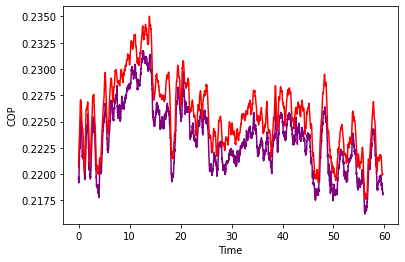

In [202]:
yexttest10=x10test10@c10
plt.plot(t10[:-30],yexttest10,marker='',color='purple',linestyle='-')
plt.plot(t10[:-30],v10[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Erro Quadrático Médio

In [203]:
yest11=np.mean(yexttest10)
y11med=np.mean(v10[30:])
e=np.sqrt(np.mean((yest11-y11med)**2))
print(e)

0.0022363537497930575
